<a href="https://colab.research.google.com/github/avantika-18/-code-scanning-exercise/blob/main/Filter_Methods_Mutual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exercise 3: Information Gain (Mutual Information)**

Problem Description:
Capture any dependency (linear or non-linear) between feature and target with mutual information.

Solution Overview:
Compute MI via mutual_info_classif, rank, and plot

In [1]:
# 3.1 Setup
!pip install scikit-learn pandas matplotlib seaborn --quiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.feature_selection import mutual_info_classif

In [ ]:

# 3.2 Load Data
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
print("Original features:", list(X.columns))

Original features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:

# 3.3 Compute and display MI scores
mi_scores = mutual_info_classif(X, y, random_state=42)
df_mi = pd.DataFrame({
'feature': X.columns,
'MI_score': mi_scores
}).sort_values('MI_score', ascending=False)
print("Mutual Information scores:\n", df_mi)


Mutual Information scores:
              feature  MI_score
2  petal length (cm)  0.992573
3   petal width (cm)  0.985643
0  sepal length (cm)  0.511365
1   sepal width (cm)  0.299424


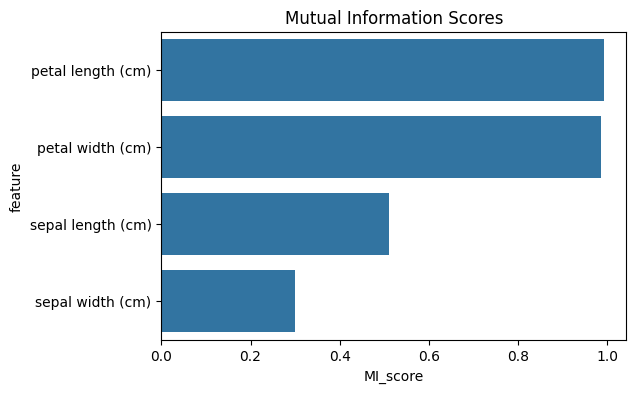

In [ ]:
# 3.4 Plot
plt.figure(figsize=(6,4))
sns.barplot(x='MI_score', y='feature', data=df_mi)
plt.title('Mutual Information Scores')
plt.show()

*3.3 Analysis*

Explain how mutual information differs from correlation.

Which features carry the most information about the target?

Plot MI scores in a bar chart

In [ ]:

# 3.5 Analysis 1: Compare MI to ANOVA F-scores
from sklearn.feature_selection import SelectKBest, f_classif

# Compute ANOVA F-scores for comparison
anova_selector = SelectKBest(score_func=f_classif, k=X.shape[1])
anova_selector.fit(X, y)
df_anova = pd.DataFrame({
    'feature': X.columns,
    'F_score': anova_selector.scores_
}).sort_values('F_score', ascending=False)

# Merge and display side by side
df_compare = df_anova.merge(df_mi, on='feature')
print("ANOVA F-scores vs. MI scores:\n", df_compare)

# Optional: correlation between the two score sets
corr_coef = df_compare['F_score'].corr(df_compare['MI_score'])
print(f"Correlation between F-score and MI: {corr_coef:.3f}")

ANOVA F-scores vs. MI scores:
              feature      F_score  MI_score
0  petal length (cm)  1180.161182  0.992573
1   petal width (cm)   960.007147  0.985643
2  sepal length (cm)   119.264502  0.511365
3   sepal width (cm)    49.160040  0.299424
Correlation between F-score and MI: 0.969


/tmp/ipython-input-17-2834714800.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[feat], y=y, palette='deep', edgecolor='w')


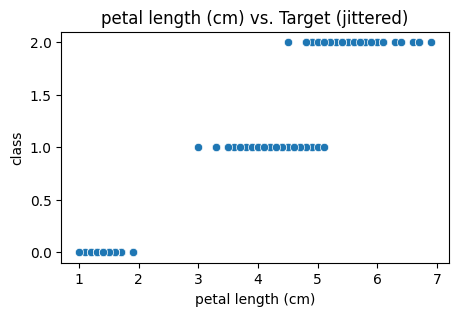

/tmp/ipython-input-17-2834714800.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[feat], y=y, palette='deep', edgecolor='w')


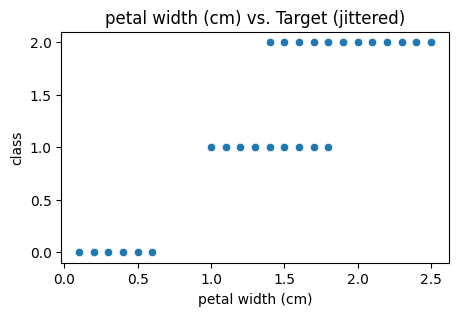

/tmp/ipython-input-17-2834714800.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X[feat], y=y, palette='deep', edgecolor='w')


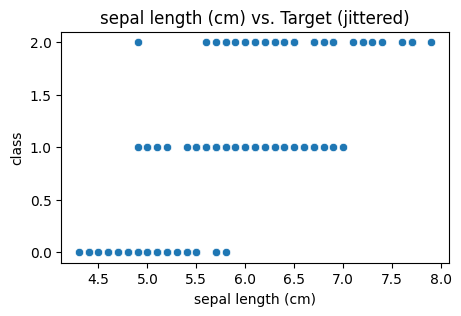

In [ ]:

# 3.6 Analysis 2: Visualize non-linear relationships for top MI features
top_features = df_mi['feature'].head(3).tolist()
for feat in top_features:
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=X[feat], y=y, palette='deep', edgecolor='w')
    plt.title(f"{feat} vs. Target (jittered)")
    plt.xlabel(feat)
    plt.ylabel('class')
    plt.show()

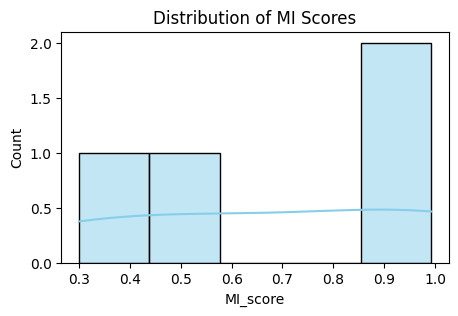

Top-k MI feature stability: {1: ['petal length (cm)'], 2: ['petal length (cm)', 'petal width (cm)'], 3: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)'], 4: ['petal length (cm)', 'petal width (cm)', 'sepal length (cm)', 'sepal width (cm)']}


In [ ]:
# 3.7 Analysis 3: MI score distribution and stability
# Histogram of MI scores
plt.figure(figsize=(5,3))
sns.histplot(df_mi['MI_score'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of MI Scores")
plt.show()

# Stability: top-k features for k=1..4
stability = {}
for k in range(1,5):
    stability[k] = df_mi['feature'].head(k).tolist()
print("Top-k MI feature stability:", stability)
